## Machine Learning for Computer Vision SoSe 2022

### Praktikum 4

Experimente mit Textur

Texturmermale: Haralick features

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html

https://scikit-image.org/docs/dev/api/skimage.feature.html#greycoprops

In [1]:
import matplotlib.pyplot as plt
from skimage import data

In [2]:
from skimage.feature import greycomatrix, greycoprops

In [3]:
import numpy as np

In [4]:
G = np.array([[0,1,0,1,2,3],[0,0,1,2,2,2],[0,0,1,1,1,2],[0,1,2,2,3,3],[0,2,2,3,3,3],[2,2,2,3,3,3]])

In [5]:
G.shape

(6, 6)

In [6]:
G

array([[0, 1, 0, 1, 2, 3],
       [0, 0, 1, 2, 2, 2],
       [0, 0, 1, 1, 1, 2],
       [0, 1, 2, 2, 3, 3],
       [0, 2, 2, 3, 3, 3],
       [2, 2, 2, 3, 3, 3]])

In [7]:
glcm = greycomatrix(G, distances=[1], angles=[0], levels=4,
                        symmetric=False, normed=False)

C:\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')


In [8]:
a = glcm

In [9]:
np.reshape(a, (4, 4))

array([[2, 5, 1, 0],
       [1, 2, 4, 0],
       [0, 0, 6, 4],
       [0, 0, 0, 5]], dtype=uint32)

Ausschnitte einer festen Größe (Patches)in dem Bild aussuschen (Angabe von Koordinaten)

In [10]:
PATCH_SIZE = 21

# open the camera image
image = data.camera()

# select some patches from grassy areas of the image
grass_locations = [(380, 454), (442, 323), (444, 492), (455, 455)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

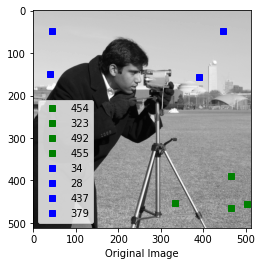

In [11]:
plt.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs', label=str(x))
for (y, x) in sky_locations:
    plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs', label=str(x))
plt.xlabel('Original Image')
plt.axis('image')
plt.legend()
plt.show()

Co-occurence Merkmale 'disssimilarity' und 'correlation' berechnen. Man könnte auch mehr als zwei Merkmale oder andere MErkmale berechnen (i.e. 'contrast', 'homogenity', 'ASM', 'energy').

In [12]:
# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

C:\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecati

Der Parameter 'levels' steht für die Anzahl der verwendeten Grauwerte.

Größe der GLCM (Grey Level Co-Occurence Matrix):

In [13]:
glcm.shape

(256, 256, 1, 1)

In [14]:
print(greycoprops(glcm, 'dissimilarity'))

[[0.53869048]]


C:\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


In [15]:
print(xs)

[14.553571428571429, 21.023809523809522, 20.53333333333334, 18.800595238095244, 0.4672619047619047, 0.574404761904762, 0.5208333333333333, 0.5386904761904763]


In [16]:
print(ys)

[0.16615047386008003, 0.07420775953522148, -0.023432882073998917, 0.03211156902114872, 0.6499750949948055, 0.7303979048396345, 0.7674139951474306, 0.515159575352349]


Ergebnisse Zeichnen: Die Merkmale 'correlation' und 'dissimilarity' lassen sich durch einen lineare Klassifikator für die 8 Punkte und zwei Klassen trennen. 

'dissimilarity' alleine würde genügen, um die Punkte zu trennen.

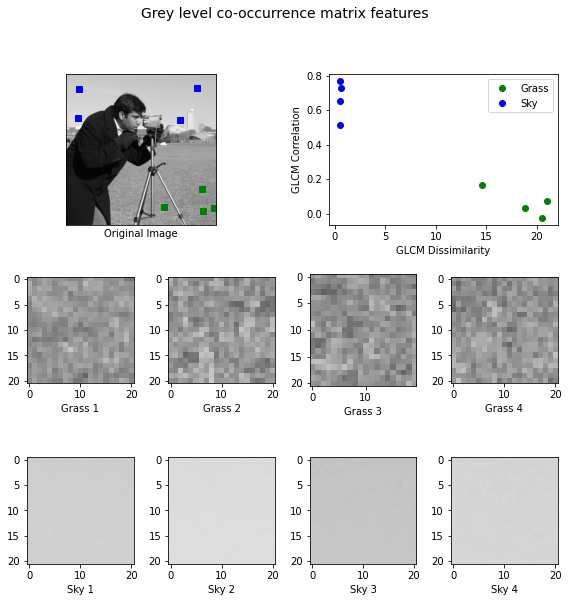

In [17]:
# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


Zweite Art von Textur-Merkmalen: Gabor-Features:

https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=gabor#gabor-kernel

In [18]:
import numpy as np
from skimage.filters import gabor_kernel
# Breite des Filters
sigma = 2
# Rotation der Sinuwellen in der Ebene
theta = 0.5 * np.pi
# Frequenz der Sinuswellen
frequency = 0.1
complex_kernel = gabor_kernel(frequency, theta=theta,sigma_x=sigma, sigma_y=sigma)

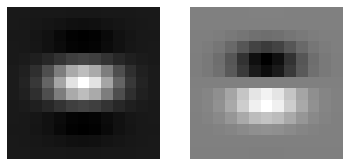

In [19]:
fig = plt.figure()
ax1 = plt.subplot(1,2,1)
ax1.imshow(np.real(complex_kernel), cmap='gray')
ax1.set_axis_off()
ax2 = plt.subplot(1,2,2)
ax2.imshow(np.imag(complex_kernel), cmap='gray')
ax2.set_axis_off()
plt.show()

In [20]:
def get_filter_bank():
    kernels = []
    for theta in range(4):
        theta = theta / 4. * np.pi
        for sigma in (2, 3):
            # hier nur den Realteil nehmen
            for frequency in (0.1, 0.2):
                kernel = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
                kernels.append(kernel)
    return kernels


In [21]:
def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats

In [22]:
kernels = get_filter_bank()

In [23]:
kernels[13].shape

(11, 11)

In [24]:
from skimage import io

In [25]:
#img = io.imread('textures/1.4.01.tiff');

In [26]:
img = io.imread('textures/1.2.12.tiff');

In [27]:
import cv2

In [28]:
img_small = cv2.resize(img,(250,250))

In [29]:
from scipy import ndimage

In [30]:
filtered = ndimage.convolve(img_small, kernels[4], mode='wrap')

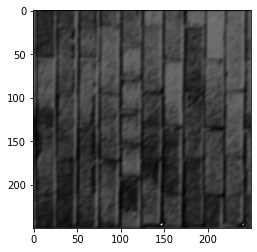

In [31]:
plt.imshow(filtered,'gray')

In [32]:
len(kernels)

16

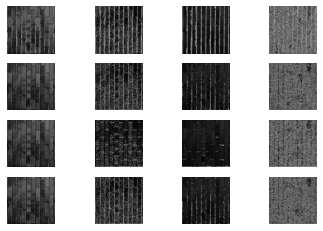

In [33]:
fig = plt.figure()
i = 0
for kernel in kernels:
    filtered = ndimage.convolve(img, kernel, mode='wrap')
    ax = plt.subplot(4, 4, i+1)
    ax.set_axis_off()
    ax.imshow(filtered,'gray')
    i+=1
    if (i > 16):
        break
#plt.show()

In [34]:
fig.savefig('filtered_images.png')

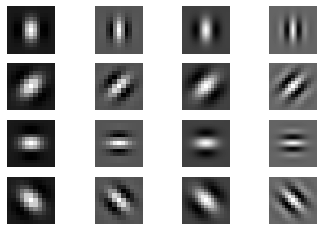

In [35]:
fig = plt.figure()
i = 0
for kernel in kernels:
    ax = plt.subplot(4, 4, i+1)
    ax.set_axis_off()
    ax.imshow(kernel,'gray')
    i+=1
    if (i > 16):
        break
fig.savefig('filters.png')

Die dritte Art von Textur-Merkmalen: Local Binary Patterns

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html

In [36]:
#LBPs

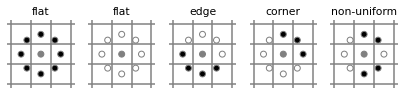

In [37]:
import numpy as np
import matplotlib.pyplot as plt


METHOD = 'uniform'
plt.rcParams['font.size'] = 9


def plot_circle(ax, center, radius, color):
    circle = plt.Circle(center, radius, facecolor=color, edgecolor='0.5')
    ax.add_patch(circle)


def plot_lbp_model(ax, binary_values):
    """Draw the schematic for a local binary pattern."""
    # Geometry spec
    theta = np.deg2rad(45)
    R = 1
    r = 0.15
    w = 1.5
    gray = '0.5'

    # Draw the central pixel.
    plot_circle(ax, (0, 0), radius=r, color=gray)
    # Draw the surrounding pixels.
    for i, facecolor in enumerate(binary_values):
        x = R * np.cos(i * theta)
        y = R * np.sin(i * theta)
        plot_circle(ax, (x, y), radius=r, color=str(facecolor))

    # Draw the pixel grid.
    for x in np.linspace(-w, w, 4):
        ax.axvline(x, color=gray)
        ax.axhline(x, color=gray)

    # Tweak the layout.
    ax.axis('image')
    ax.axis('off')
    size = w + 0.2
    ax.set_xlim(-size, size)
    ax.set_ylim(-size, size)


fig, axes = plt.subplots(ncols=5, figsize=(7, 2))

titles = ['flat', 'flat', 'edge', 'corner', 'non-uniform']

binary_patterns = [np.zeros(8),
                   np.ones(8),
                   np.hstack([np.ones(4), np.zeros(4)]),
                   np.hstack([np.zeros(3), np.ones(5)]),
                   [1, 0, 0, 1, 1, 1, 0, 0]]

for ax, values, name in zip(axes, binary_patterns, titles):
    plot_lbp_model(ax, values)
    ax.set_title(name)

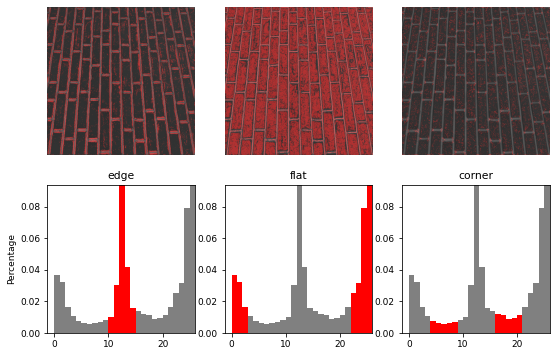

In [38]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

# settings for LBP
radius = 3
n_points = 8 * radius


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


image = data.brick()
lbp = local_binary_pattern(image, n_points, radius, METHOD)


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

In [39]:
lbp.shape

(512, 512)

In [40]:
lbp.max()

25.0

In [41]:
lbp_default = local_binary_pattern(image, n_points, radius, 'default')

In [42]:
lbp_default.max()

16777215.0

Rotated images matched against references using Gabor filter banks:
original: brick, rotated: 30deg, match result: brick
original: brick, rotated: 70deg, match result: brick
original: grass, rotated: 145deg, match result: brick


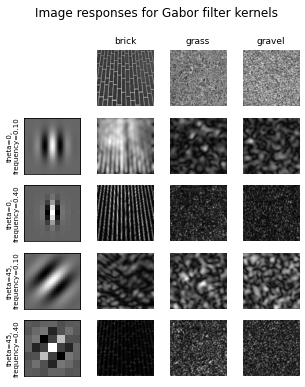

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i


# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)


shrink = (slice(0, None, 3), slice(0, None, 3))
brick = img_as_float(data.brick())[shrink]
grass = img_as_float(data.grass())[shrink]
gravel = img_as_float(data.gravel())[shrink]
image_names = ('brick', 'grass', 'gravel')
images = (brick, grass, gravel)

# prepare reference features
ref_feats = np.zeros((3, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(brick, kernels)
ref_feats[1, :, :] = compute_feats(grass, kernels)
ref_feats[2, :, :] = compute_feats(gravel, kernels)

print('Rotated images matched against references using Gabor filter banks:')

print('original: brick, rotated: 30deg, match result: ', end='')
feats = compute_feats(ndi.rotate(brick, angle=190, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: brick, rotated: 70deg, match result: ', end='')
feats = compute_feats(ndi.rotate(brick, angle=70, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: grass, rotated: 145deg, match result: ', end='')
feats = compute_feats(ndi.rotate(grass, angle=145, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                   ndi.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(5, 6))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel))
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()